# Import Libraries

In [8]:
import os
from pathlib import Path
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface
from pathlib import Path

## Training

In [34]:
# load vocab
with open('vocabulary/idx_to_string.json') as json_file:
    idx_to_string_json = json.load(json_file)
        
idx_to_string = dict()
for key in idx_to_string_json:
    idx_to_string[int(key)] = idx_to_string_json[key]
    
with open('vocabulary/string_to_index.json') as json_file:
    string_to_index = json.load(json_file)

In [35]:
root = Path('Data')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'train2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 1,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

coco_interface_train = MSCOCOInterface(**interface_params)

print(f"Lenght: {len(coco_interface_train)}")

Lenght: 118287


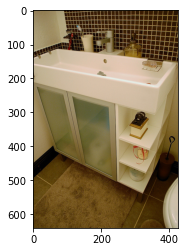

<SOS> a kitchen sink and shelves sit next to a toilet <EOS> 


In [36]:
idx = random.randint(0, len(coco_interface_train.coco.imgs))
coco_interface.display_img_with_captions(idx)
for cap_idx in range(coco_interface.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

## Evaluation

In [37]:
root = Path('Data')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'val2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_val2017.json'

interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 1,
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index
}

coco_interface_val = MSCOCOInterface(**interface_params)

print(f"Lenght: {len(coco_interface_val)}")

Lenght: 5000


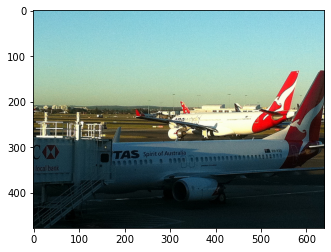

<SOS> a bunch of airplanes are parked on the runway <EOS> 


In [38]:
idx = random.randint(0, len(coco_interface_val.coco.imgs))
coco_interface.display_img_with_captions(idx)
for cap_idx in range(coco_interface.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

In [7]:
%%time
coco_interface.idx_to_string = None
coco_interface.string_to_index = None
coco_interface.vocabulary.build_vocab2(coco_interface.coco.captions_to_list())

Wall time: 27 s
